# Bank marketing campaigns dataset analysis - Opening a Term Deposit

It is a dataset that describing Portugal bank marketing campaigns results.
Conducted campaigns were based mostly on direct phone calls, offering bank client to place a term deposit.
If after all marking afforts client had agreed to place deposit - target variable marked 'yes', otherwise 'no'

## Dataset

### Bank's Client Data:

1. age (numeric)

2. job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")

3. marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)

4. education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")

5. default: has credit in default? (categorical: "no","yes","unknown")

6. housing: has housing loan? (categorical: "no","yes","unknown")

7. loan: has personal loan? (categorical: "no","yes","unknown")

### Info related with the last contact of the current campaign:

8. contact: contact communication type (categorical: "cellular","telephone")

9. month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")

10. dayofweek: last contact day of the week (categorical: "mon","tue","wed","thu","fri")

11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### Other attributes:

12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14. previous: number of contacts performed before this campaign and for this client (numeric)

15. poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

### Social and economic context attributes

16. emp.var.rate: employment variation rate - quarterly indicator (numeric)

17. cons.price.idx: consumer price index - monthly indicator (numeric)

18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19. euribor3m: euribor 3 month rate - daily indicator (numeric)

20. nr.employed: number of employees - quarterly indicator (numeric)

### Output variable (desired target):

21. y: has the client subscribed a term deposit? (binary: "yes","no")


# Metric
We need to avoid false negatives. Every time we have a false negative, a new deposit is missed. To mitigate this problem, we will use the **Recall** Score as metric.

# 1. **ETL**, pre-processing and feature engineering

On this notebook we will load the data, undestand it and engineer its features to improve the model.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from pandas import get_dummies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from scipy import stats


%matplotlib inline

In [2]:
# The code was removed by Watson Studio for sharing.

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


We need to check the datatype.

In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

It seems everything is ok at first sight. Let's create a copy of the dataframe to work and let's work with the object data.

In [4]:
df = dataframe

First, let's find all the binary attributes (2 values) and rewrite them as 0 and 1.

In [5]:
for column in df.columns:
    if df[column].value_counts().count() == 2:
        print(column)

contact
y


First step is to change the "y", our target, to 1 (yest) and 0 (no).

In [6]:
df["y"] = np.where(df["y"] == "no", 0, 1)

Let's do the same for contact.

In [7]:
df["contact"] = np.where(df["contact"] == "cellular", 1, 0)

Now we take a look in the result

In [8]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,0,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,0,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,0,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,0,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,0,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
5,45,services,married,basic.9y,unknown,no,no,0,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
6,59,admin.,married,professional.course,no,no,no,0,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
7,41,blue-collar,married,unknown,unknown,no,no,0,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
8,24,technician,single,professional.course,no,yes,no,0,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
9,25,services,single,high.school,no,yes,no,0,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


# 1.2. Transforming and Engineering Data

In this section we will try to make some feature engineering by creating, merging and/or removing attributes. The aim is to reduce number of features if possible, and to change all columns to numeric values usaing label enconding or one-hot-enconder. 

In [9]:
df.iloc[:,:10]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week
0,56,housemaid,married,basic.4y,no,no,no,0,may,mon
1,57,services,married,high.school,unknown,no,no,0,may,mon
2,37,services,married,high.school,no,yes,no,0,may,mon
3,40,admin.,married,basic.6y,no,no,no,0,may,mon
4,56,services,married,high.school,no,no,yes,0,may,mon
5,45,services,married,basic.9y,unknown,no,no,0,may,mon
6,59,admin.,married,professional.course,no,no,no,0,may,mon
7,41,blue-collar,married,unknown,unknown,no,no,0,may,mon
8,24,technician,single,professional.course,no,yes,no,0,may,mon
9,25,services,single,high.school,no,yes,no,0,may,mon


For this version I cannot see how we can merge any column. It can be changed in future versions. So let's concentrate on encoding our data. First we will apply label enconding in the columns marital, education, default, housing, loan, month, day_of_week, and poutcome.

In [10]:
label_encoder = LabelEncoder()

column_list = ['marital', 'education', 'default', 'housing', 'loan', 'month',
               'day_of_week', 'poutcome']

for column in column_list:
    df[column] = label_encoder.fit_transform(df[column])

df.iloc[:, :10]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week
0,56,housemaid,1,0,0,0,0,0,6,1
1,57,services,1,3,1,0,0,0,6,1
2,37,services,1,3,0,2,0,0,6,1
3,40,admin.,1,1,0,0,0,0,6,1
4,56,services,1,3,0,0,2,0,6,1
5,45,services,1,2,1,0,0,0,6,1
6,59,admin.,1,5,0,0,0,0,6,1
7,41,blue-collar,1,7,1,0,0,0,6,1
8,24,technician,2,5,0,2,0,0,6,1
9,25,services,2,3,0,2,0,0,6,1


In [11]:
df.describe()

,age,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,1.172769,3.747184,0.208872,1.071720,0.327425,0.634748,4.230868,2.004613,258.285010,2.567593,962.475454,0.172963,0.930101,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,0.608902,2.136482,0.406686,0.985314,0.723616,0.481507,2.320025,1.397575,259.279249,2.770014,186.910907,0.494901,0.362886,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,102.000000,1.000000,999.000000,0.000000,1.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,1.000000,3.000000,0.000000,2.000000,0.000000,1.000000,4.000000,2.000000,180.000000,2.000000,999.000000,0.000000,1.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,2.000000,6.000000,0.000000,2.000000,0.000000,1.000000,6.000000,3.000000,319.000000,3.000000,999.000000,0.000000,1.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,3.000000,7.000000,2.000000,2.000000,2.000000,1.000000,9.000000,4.000000,4918.000000,56.000000,999.000000,7.000000,2.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


The last column is job.

In [12]:
print("Number of jobs: ", df.job.value_counts().count())
print("Jobs: \t\t n:")
print(df.job.value_counts())

Number of jobs:  12
Jobs: 		 n:
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64


Let's apply one-hot-encode and see what happens. We will save in a new dataframe so we can use the old one to print a correlation without the one-hot classes.

In [13]:
df_onehot = df
df_onehot = get_dummies(df_onehot, prefix=['job'], columns=['job'], drop_first=True)

# 1.3. Taking a look on the data
In this section we will visualize the data we have.

Let's first see the correlation table. 

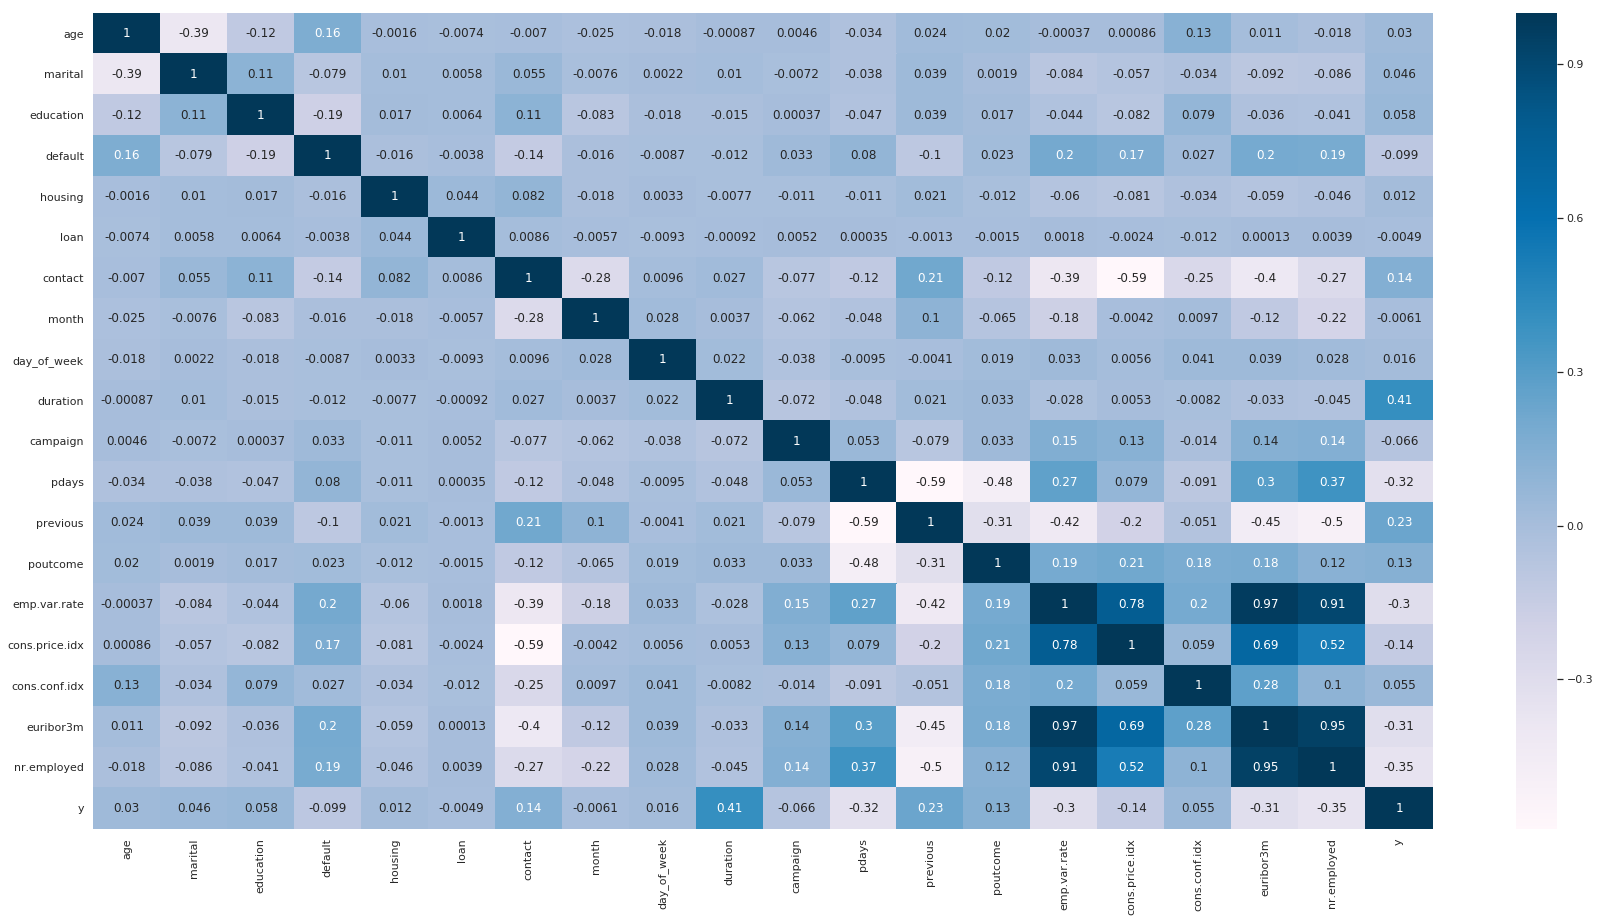

In [14]:
corr = df.corr()
sns.set(rc={'figure.figsize':(30,15)})
sns.heatmap(corr, cmap="PuBu", annot=True)

Now let's visualise the data starting with the ones with high correlation.

## 1.3.1. nr.employed vs y

/opt/conda/envs/Python36/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/envs/Python36/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


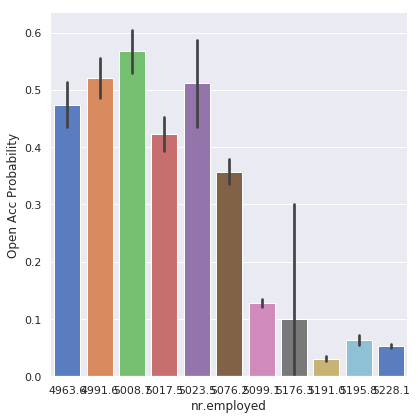

In [15]:
g = sns.factorplot(x='nr.employed', y='y', data=df, 
                   kind='bar', size=6, palette='muted')
g.despine(left=True)
g = g.set_ylabels('Open Acc Probability')

Let's check for outliers using box plot

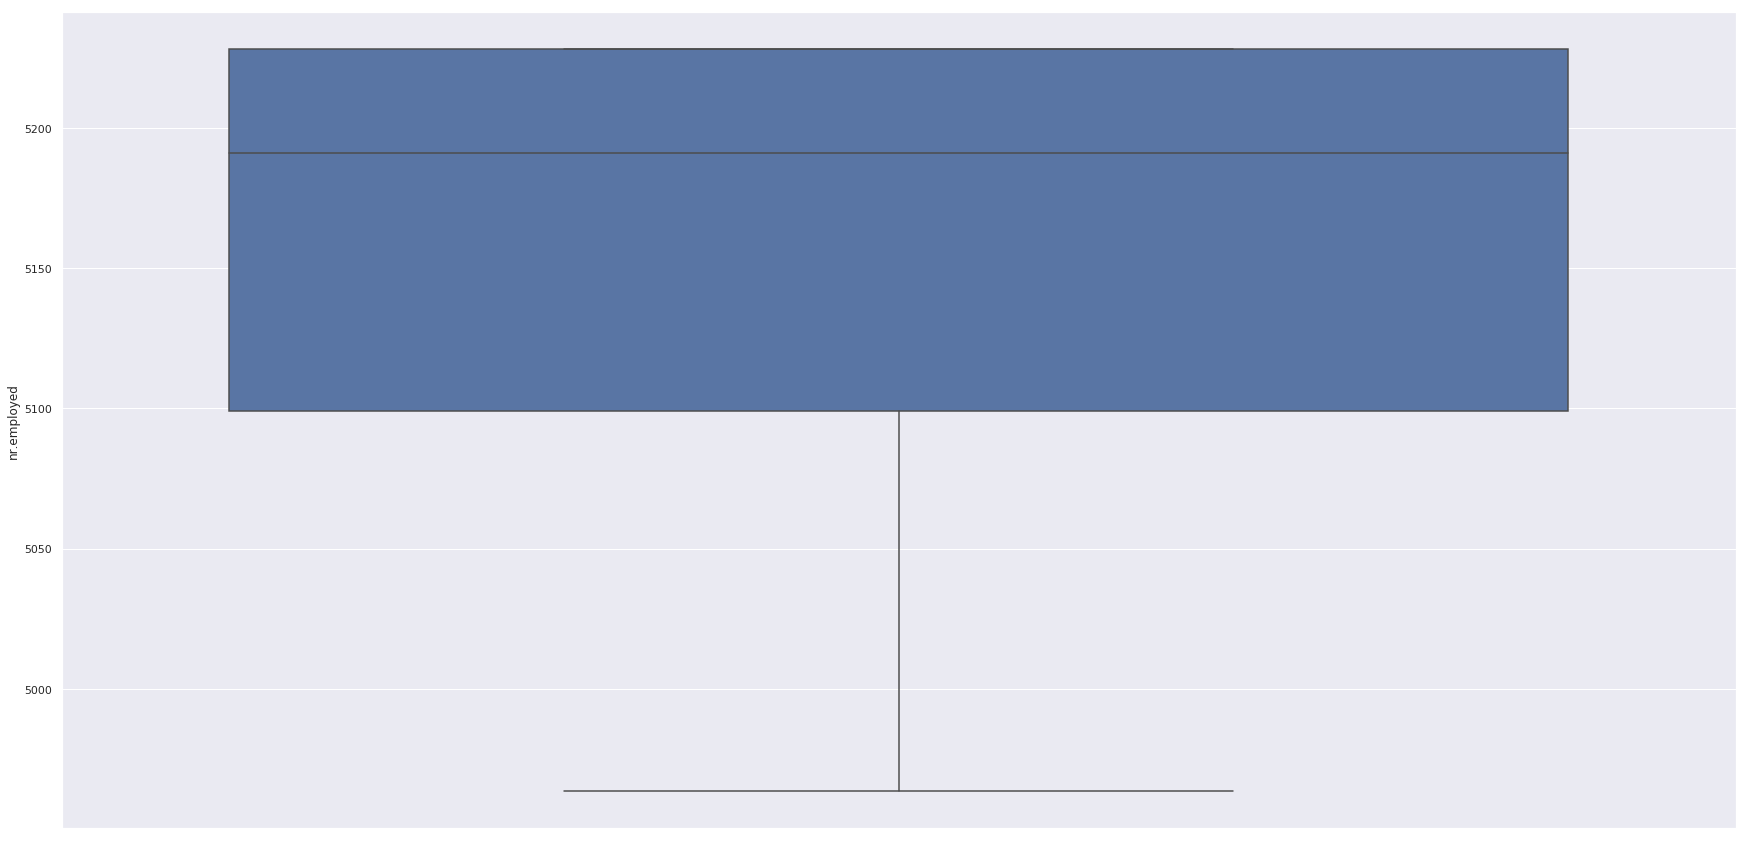

In [16]:
sns.boxplot(y='nr.employed', data=df)

Finally, let's count the number of values.

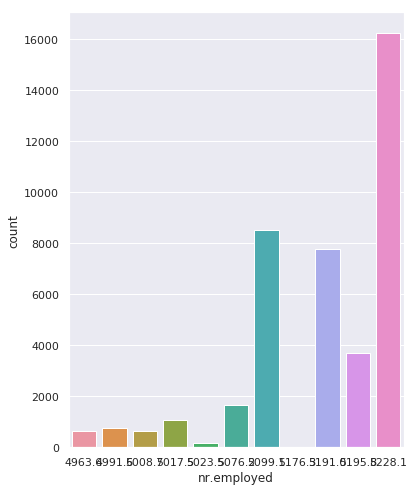

In [17]:
plt.figure(figsize=(6, 8))
g = sns.countplot(x='nr.employed', data=df)

## 1.3.2. euribor3m vs 'y'

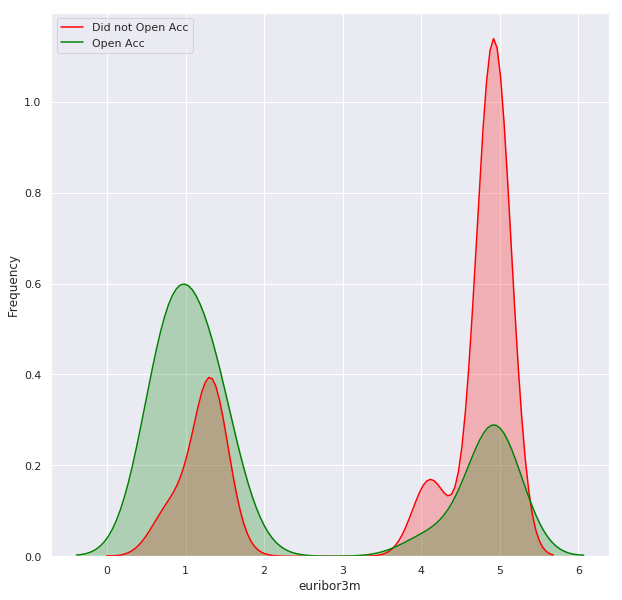

In [18]:
plt.figure(figsize=(10,10))
g = sns.kdeplot(df['euribor3m'][(df['y'] == 0) & (df['euribor3m'].notnull())], color="Red", shade=True)
g = sns.kdeplot(df['euribor3m'][(df['y'] == 1) & (df['euribor3m'].notnull())], color='green', shade=True)
g.set_xlabel('euribor3m')
g.set_ylabel('Frequency')
g = g.legend(['Did not Open Acc', 'Open Acc'])

Let's check the outliers

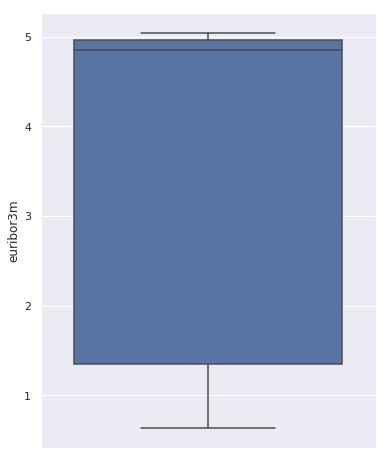

In [19]:
plt.figure(figsize=(6, 8))
g = sns.boxplot(x='euribor3m', data=df, orient='v')

## 1.3.3. cons.price.idx vs 'y'

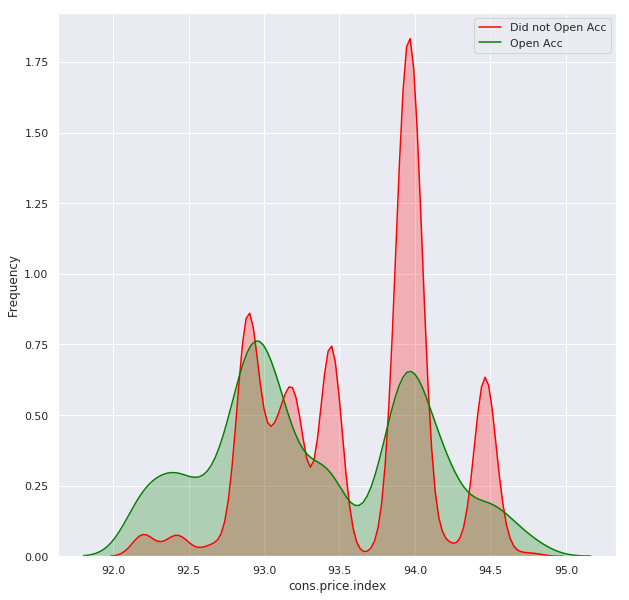

In [20]:
plt.figure(figsize=(10,10))
g = sns.kdeplot(df['cons.price.idx'][(df['y'] == 0) & (df['cons.price.idx'].notnull())], color="Red", shade=True)
g = sns.kdeplot(df['cons.price.idx'][(df['y'] == 1) & (df['cons.price.idx'].notnull())], color='green', shade=True)
g.set_xlabel('cons.price.index')
g.set_ylabel('Frequency')
g = g.legend(['Did not Open Acc', 'Open Acc'])

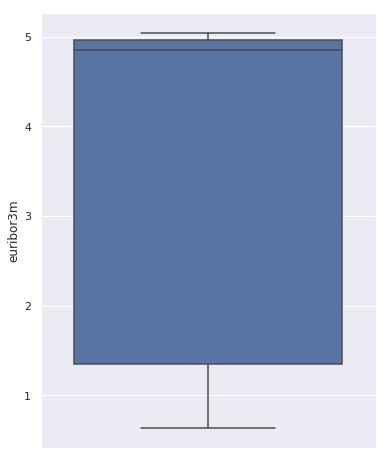

In [21]:
plt.figure(figsize=(6, 8))
g = sns.boxplot(x='euribor3m', data=df, orient='v')

## 1.3.4. emp.var.rate vs 'y'

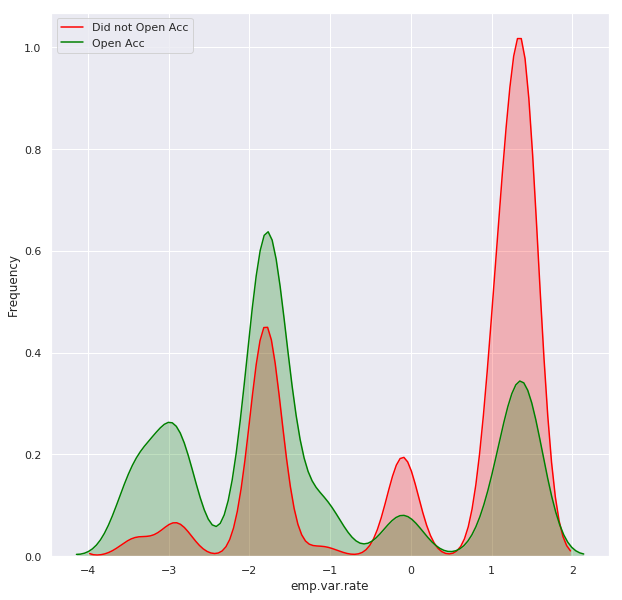

In [22]:
plt.figure(figsize=(10,10))
g = sns.kdeplot(df['emp.var.rate'][(df['y'] == 0) & (df['emp.var.rate'].notnull())], color="Red", shade=True)
g = sns.kdeplot(df['emp.var.rate'][(df['y'] == 1) & (df['emp.var.rate'].notnull())], color='green', shade=True)
g.set_xlabel('emp.var.rate')
g.set_ylabel('Frequency')
g = g.legend(['Did not Open Acc', 'Open Acc'])

We can see when the employment variation rate is negative, more people open accounts.

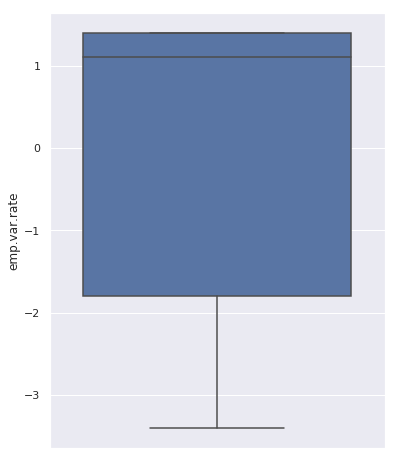

In [23]:
plt.figure(figsize=(6, 8))
g = sns.boxplot(x='emp.var.rate', data=df, orient='v')

## 1.3.5. previous vs 'y'

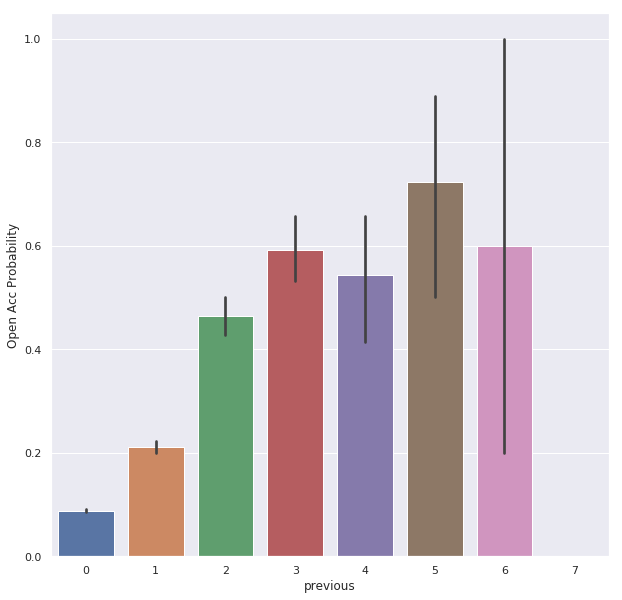

In [24]:
plt.figure(figsize=(10,10))
g = sns.barplot(x='previous', y='y', data=df)
g = g.set_ylabel('Open Acc Probability')

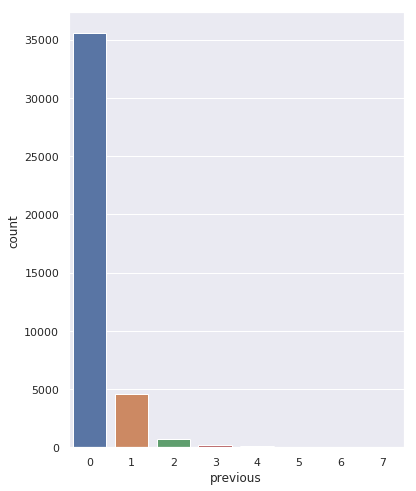

In [25]:
plt.figure(figsize=(6, 8))
g = sns.countplot(x='previous', data=df)

## 1.3.6. pdays vs 'y'

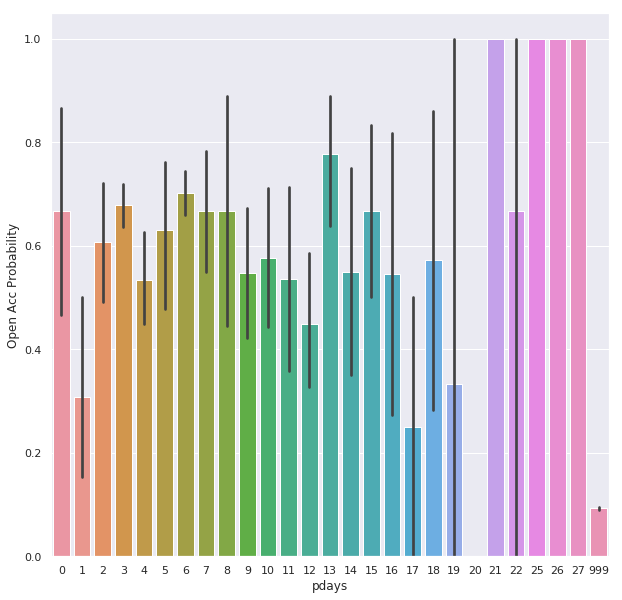

In [26]:
plt.figure(figsize=(10,10))
g = sns.barplot(x='pdays', y='y', data=df)
g = g.set_ylabel('Open Acc Probability')

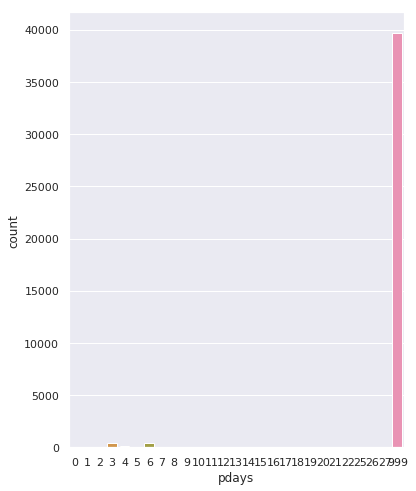

In [27]:
plt.figure(figsize=(6, 8))
g = sns.countplot(x='pdays', data=df)

## 1.3.7 Duration vs 'y'

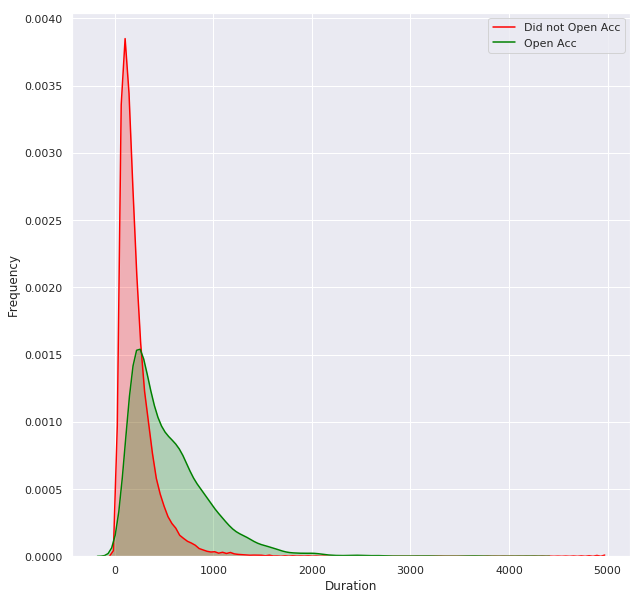

In [28]:
plt.figure(figsize=(10,10))
g = sns.kdeplot(df['duration'][(df['y'] == 0) & (df['duration'].notnull())], color="Red", shade=True)
g = sns.kdeplot(df['duration'][(df['y'] == 1) & (df['duration'].notnull())], color='green', shade=True)
g.set_xlabel('Duration')
g.set_ylabel('Frequency')
g = g.legend(['Did not Open Acc', 'Open Acc'])

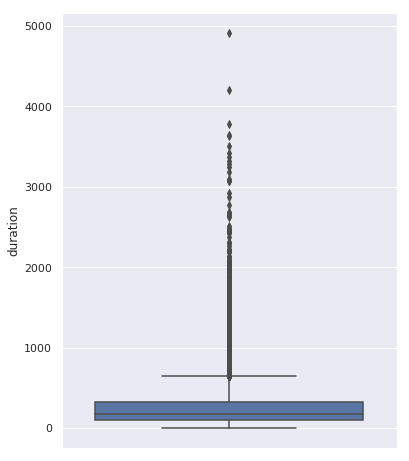

In [29]:
plt.figure(figsize=(6, 8))
g = sns.boxplot(x='duration', data=df, orient='v')

We can see we have outliers. Let's apply z-score and count the number of outliers.

In [30]:
duration_zscore = pd.DataFrame(data=df['duration'])
duration_zscore['zscore'] = stats.zscore(df['duration'])

In [31]:
n_outliers = duration_zscore.loc[duration_zscore['zscore'].abs()>3].count()
print('Number of outliers: ', n_outliers)

Number of outliers:  duration    861
zscore      861
dtype: int64


# 4. Feature Engineering
## 4.1. Remove outliers
First let's detect all outliers. We already know we have outliers on the duration columns. Let's see how many rows have outliers.

In [32]:
from collections import Counter

# Function to detect outlier
def detect_outliers(df, n, features):
    ''' Receives a dataframe of features returning a list of indices corresponding
    to the observations with more than n outliers according to Turkey's range test.
    
    INPUT
    -----
    df: Dataframe of features
    n: Integer. Limit of outliers according Turkey's Range Test
    features: String or Array of strings. Name of the feature
    
    RETURN
    ------
    List of indices
    '''
    # Array to save the outliers' indices
    indices = []
    
    # Iterate over features
    for col in features:
        # 1st quartile
        Q1 = np.percentile(df[col], 25)
        # 3d quartile
        Q3 = np.percentile(df[col], 75)
        # Interquartile
        IQR = Q3 - Q1
        
        # Outlier ster
        outlier_step = 1.5 * IQR
        
        # List of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) 
                              | (df[col] > Q3 + outlier_step)].index
        
        # Append to the list of outliers indices
        indices.extend(outlier_list_col)
        
        # select observations with mode than n outliers
    indices = Counter(indices)
    multiple_outliers = list(k for k, v in indices
                                 .items() if v > n)
        
    return multiple_outliers

In [33]:
df.describe()

,age,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,1.172769,3.747184,0.208872,1.071720,0.327425,0.634748,4.230868,2.004613,258.285010,2.567593,962.475454,0.172963,0.930101,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,0.608902,2.136482,0.406686,0.985314,0.723616,0.481507,2.320025,1.397575,259.279249,2.770014,186.910907,0.494901,0.362886,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,102.000000,1.000000,999.000000,0.000000,1.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,1.000000,3.000000,0.000000,2.000000,0.000000,1.000000,4.000000,2.000000,180.000000,2.000000,999.000000,0.000000,1.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,2.000000,6.000000,0.000000,2.000000,0.000000,1.000000,6.000000,3.000000,319.000000,3.000000,999.000000,0.000000,1.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,3.000000,7.000000,2.000000,2.000000,2.000000,1.000000,9.000000,4.000000,4918.000000,56.000000,999.000000,7.000000,2.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [34]:
df_cols = list(df_onehot.columns)
rows_outlier = detect_outliers(df_onehot, 2, df_cols)
n_outliers = len(rows_outlier)
n_rows = len(df_onehot)
print("N. Outlier: ", n_outliers)
print("N. Total Rows: ", n_rows)
print("We have {}% of rows with outliers".format(round(100*(n_outliers/n_rows), 2)))

N. Outlier:  8731
N. Total Rows:  41188
We have 21.2% of rows with outliers


We have 8731 rows with outliers. It's 21.2% of our dataset. We cannot just remove these rows, so we will replace the outliers values with the max value of each columns. Mostly are in the column education. First, let's remove outliers withou selection education.

In [35]:
def replace_outliers(df, features):
    '''Replace outliers with value of the outlier step (1.7 times interquartile)
    
    INPUT
    -----
    df: Panda Dataframe
    features: list
              List of columns to replace outliers
    
    RETURNS
    -------
    df: Panda Dataframe
        Dataframe with no outlier
    '''
    for col in features:
        print("[INFO] COLUMN: ", col)
        # 1st quartile
        Q1 = np.percentile(df[col], 25)
        # 3d quartile
        Q3 = np.percentile(df[col], 75)
        # Interquartile
        IQR = Q3 - Q1

        # Outlier step
        outlier_step = 1.5 * IQR

        df[col].loc[df[col] > outlier_step]  = outlier_step
    return df

First, let's select the features we want to remove the outliers.

In [36]:
non_categorical_cols = ['age', 'duration', 'campaign', 'pdays', 'emp.var.rate',
                        'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
df_eng = df_onehot
df_eng = replace_outliers(df_eng, non_categorical_cols)

[INFO] COLUMN:  age
[INFO] COLUMN:  duration


/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


[INFO] COLUMN:  campaign
[INFO] COLUMN:  pdays
[INFO] COLUMN:  emp.var.rate
[INFO] COLUMN:  cons.price.idx
[INFO] COLUMN:  cons.conf.idx
[INFO] COLUMN:  euribor3m
[INFO] COLUMN:  nr.employed


Let's check if we still have outliers

In [37]:
rows_outlier = detect_outliers(df_eng, 2, non_categorical_cols)
n_outliers = len(rows_outlier)
n_rows = len(df_eng)
print("N. Outlier: ", n_outliers)
print("N. Total Rows: ", n_rows)
print("We have {}% of rows with outliers".format(round(100*(n_outliers/n_rows), 2)))

N. Outlier:  0
N. Total Rows:  41188
We have 0.0% of rows with outliers


As we can see all the outliers has been removed. To visualize, let's replot the box plot for the duration.

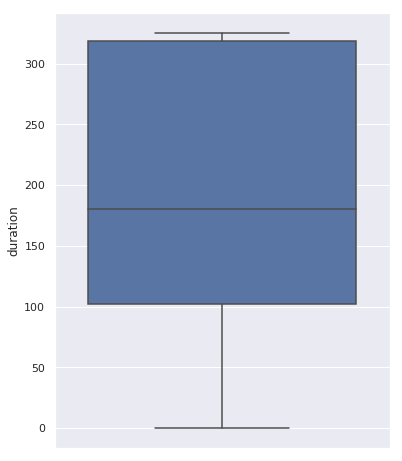

In [38]:
plt.figure(figsize=(6, 8))
g = sns.boxplot(x='duration', data=df_eng, orient='v')

## 4.2. ETL Function
Now, we will define a function that will be used on the pipeline. This function has all the data transformation steps defined above.

In [39]:
def etl_df(df):
    """Prepare the dataframe to be used for predictions following the
    follow steps:
    1 - Label encoding
    2 - Changing pdays to binary (now it is previously contacted or not)
    3 - One-hot-enconding the columns 'job'
    4 - Removing outlier
    
    Parameters
    ----------
    df: dataframe
        The dataframe resulted from etl.
    
    Returns
    -------
    df: dataframe
        The dataframe with its new features and ready for training
    """
    new_df = df
    label_encoder = LabelEncoder()

    column_list = ['marital', 'education', 'default', 'housing', 'loan', 'month',
                   'day_of_week', 'poutcome']
    
    
    for column in column_list:
        new_df[column] = label_encoder.fit_transform(df[column])
    
    new_df = get_dummies(new_df, prefix=['job'], columns=['job'], drop_first=True)
    
    non_categorical_cols = ['age', 'duration', 'campaign', 'pdays', 'emp.var.rate',
                        'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
    
    new_df = replace_outliers(new_df, non_categorical_cols)
    
    return new_df